# Data Analyze

To process data properly, we need to analyze data


# Import Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import networkx as nx
from itertools import combinations
from tqdm import tqdm

# Process Data

Frist, read CSV file and process it. Generate User-item pairs.


In [15]:
csv = pd.read_csv('../data/json_parsed.csv')

# Since pandas writes list as string, retrieve them
csv['links'] = csv.links.apply(lambda x: ast.literal_eval(x)[0])
csv['contributors'] = csv.contributors.apply(lambda x: ast.literal_eval(x)[0])
csv['category'] = csv.category.apply(lambda x: ast.literal_eval(x)[0])
csv['link_length'] = csv.links.apply(lambda x: len(x))
redirect = csv[(csv.link_length == 1) & (csv.text.str.contains('redirect'))]
csv = csv[~((csv.link_length == 1) & (csv.text.str.contains('redirect')))]


In [16]:
relink = {}

for index, row in redirect.iterrows():
    relink[row['title']] = row['links'][0]

diction = {}
category_transformer = {}
i = 0

for index, row in tqdm(csv.iterrows()):
    link = relink.get(row['title'])
    if link:
        # Since there are secondary redirected documents, explore non-redirect document
        while relink.get(link) is not None:
            if link == relink.get(link):
                break
            link = relink.get(link)

        if diction.get(link):
            diction[link].extend(row['contributors'])
        else:
            diction[link] = row['contributors']

        if category_transformer.get(link):
            category_transformer[link].extend(row['category'])
        else:
            category_transformer[link] = row['category']

    else:
        if diction.get(row['title']):
            diction[row['title']].extend(row['contributors'])
        else:
            diction[row['title']] = row['contributors']

        if category_transformer.get(row['title']):
            category_transformer[row['title']].extend(row['category'])
        else:
            category_transformer[row['title']] = row['category']

    i += 1



#processed = mpPandasObj(process_contributors, csv, numThreads=process_num, relink=relink)
#processed = pd.DataFrame(list(processed.items()), columns=['title', 'contributors'])
processed = pd.DataFrame(list(diction.items()), columns=['title', 'contributors'])
#processed['title'] = processed.title.apply(lambda x : category_transformer[x])

processed = processed.explode('contributors')

contributor_count = processed.groupby('title').count()
doc_count = processed.groupby('contributors').count()

def divide_tag(x):
    tags = []
    for e in x:
        tags += e.split('/')


    return list(set(tags))

csv['category'] = csv.category.apply(lambda x : divide_tag(x))

571371it [00:40, 14002.28it/s]


In [17]:
csv['category_length'] = csv.category.apply(lambda x: len(x))

# Data description

Simple description of data. We can check mean, std and qunatiles.


In [3]:
contributor_count = contributor_count.sort_values('contributors' ,ascending=False)

contributor_count.head(10)

,contributors
title,
대한민국,2895
오락실/서울,2874
야스오(리그 오브 레전드),2847
D.Va,2613
오락실/경기/남부,2529
청해진해운 세월호 침몰 사고,2495
홍진호,2476
고양이,2395
북한,2347


Top 10 documents that are modified frequently. 

In [ ]:
contributor_count.describe()

,contributors
count,573334.000000
mean,42.142931
std,84.274899
min,1.000000
25%,7.000000
50%,16.000000
75%,41.000000
max,2895.000000


In [ ]:
doc_count = doc_count.sort_values('title' ,ascending=False)

doc_count.head(10)

,title
contributors,
namubot,308148
kiwitree2,283390
samduk,131879
albert_einstein,60745
owb101,41000
korhermit,37868
e080hsm,37528
49.163.93.241,26566
general9753,25977


Top 10 contributors. First and second are bots. After third is human. So we can see that the greatest contributor is samduk

In [ ]:
doc_count.describe()

,title
count,2.077510e+06
mean,1.163026e+01
std,3.376847e+02
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,4.000000e+00
max,3.081480e+05


## Histogram


array([[<AxesSubplot:title={'center':'contributors'}>]], dtype=object)

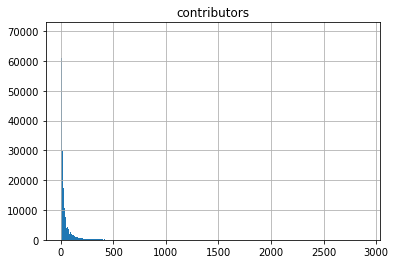

In [15]:
contributor_count.hist(bins=1000)

array([[<AxesSubplot:title={'center':'title'}>]], dtype=object)

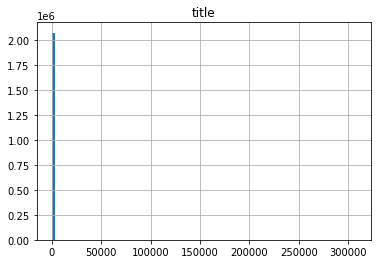

In [19]:
doc_count.hist(bins=100)

In [18]:
# To Pad categorical features, check max num of category of document

csv['category_length'].describe()

count    571371.000000
mean          2.870231
std           2.402202
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          43.000000
Name: category_length, dtype: float64

In [19]:
csv.sort_values('category_length' ,ascending=False).head(10)

,title,text,category,links,contributors,link_length,category_length
87042,마이클 J. 폭스,할리우드 명예의 거리 입성자 이름 마이클 J. 폭스 MICHAEL J FOX 분야...,"[아일랜드계 캐나다인, 잉글랜드계 캐나다인, 미국의 드라마 감독, 캐나다의 남가수,...","[스튜어트 리틀, 6월 9일, 백 투 더 퓨처 시리즈, 동안, 강수진(KBS 성우)...","[r:canicula, 221.161.137.3, 59.10.174.232, for...",46,43
853355,조선/왕실,"조선 왕실 관향 전라북도 전주시 창업군주 태조 이성계 중시조 세조, 중종, 인조,...","[전주 이씨 완풍대군파, 전주 이씨 무림군파, 전주 이씨 의평군파, 전주 이씨 덕양...","[광평대군, 연희궁, 정현왕후, 장경왕후, 효순왕후, 변안열, 이방번, 현숙공주, ...","[bart0130, halfling, cometleeko, mkj3533, 112....",354,39
745644,마틴 쇼트,역대 토니상 시상식 남우주연상 - 뮤지컬 부문 제52회 (1998년) → 제53회...,"[1979년 데뷔, 아일랜드계 캐나다인, 캐나다의 방송 PD, 미국의 방송작가, 캐...","[코미디언, 맥마스터 대학교, 프로듀서, 현재, 성우, 2000년, 카바레, 캐나다...","[googol, 119.70.108.247, urrbwhd, kiwitree2]",22,37
766128,윌 아넷,Will Arnett 본명 윌리엄 에머슨 아넷 (William Emerson Ar...,"[아일랜드계 캐나다인, 캐나다의 방송 PD, 미국의 방송작가, 프랑스계 미국인, 캐...","[코미디언, 미국, 프로듀서, 캐나다, 음악가, 배우, 온타리오 주, 작가, 성우,...","[219.248.135.84, 122.36.246.227, cw0323, urrbw...",16,37
542407,세브달리자,Sevdaliza 이름 세브달리자(Sevdaliza) 본명 세브다 앨리자데흐(Se...,"[ㅅ, 러시아계 이란인, 테헤란 출신 인물, 네덜란드의 여가수, 네덜란드의 여성 작...","[싱어송라이터, 하나투어, 가수, 펜타포트 락 페스티벌, 트립 합, 테헤란, 일렉트...","[c__c, urrbwhd, 121.138.61.48, wikic, kiwitree...",15,36
139645,스티븐 시걸,스티븐 시걸 Steven Seagal 본명 스티븐 프레데릭 시걸 (Steven F...,"[ㅅ, 미국의 환경 운동가, 미국의 드라마 배우, 미국의 드라마 제작자, 배우 출신...","[더 키퍼, 2005년, 니 캐핑, 리사 실버맨, 마피아, 세르비아, 아이키도, 하...","[114.76.88.213, 116.41.137.252, iyunmin1586, 1...",136,36
624022,오데야 러쉬,오데야 러쉬 אודיה רש ｜ Odeya Rush 본명 오데야 러쉬네크 Odey...,"[이스라엘의 영화 제작자, 미국 여배우, 이스라엘의 애니메이션 각본가, 이스라엘의 ...","[2015년, 1997년, 해피 어게인, 2016년, 사랑, 스무살, 배우, 스피닝...","[biobeo, kiwitree5, 99.237.177.85, urrbwhd, ki...",29,36
516842,마이크 마이어스(코미디언),할리우드 명예의 거리 입성자 이름마이크 마이어스 MIKE MYERS 분야영화 입성...,"[영국의 남성 코미디언, 캐나다의 방송 PD, 캐나다의 다큐멘터리 감독, 영국의 영...","[카녜이 웨스트, 저스틴 팀버레이크, 데미 무어, 바스터즈: 거친 녀석들, 새터데이...","[221.158.252.42, a_004, 121.134.184.110, 121.1...",34,36
302509,천정배,역임한 직위 대한민국 국회 대한민국 국회 국회운영위원장 제16대 후반기 유용태 →...,"[국민의당(2016년) 대표, 제20대 국회의원, 민주통합당 국회의원, 제16대 국...","[제16대 대통령 선거, 6.25 전쟁, 안산시, 제18대 국회의원, 한나라당, 공...","[egyoon1, sangmin4480, 119.202.81.168, 175.200...",169,35
129312,세스 로건,"Seth Aaron Rogen 개요 캐나다 밴쿠버 출신의 미국[* 정확히는 미국,...","[ㅅ, 캐나다의 방송 PD, 미국의 방송작가, 캐나다의 남가수, 캐나다의 방송작가,...","[션 두리틀, 제임스 프랭코, 성우, 롱 샷(2019), 워싱턴 메트로, 왼손잡이,...","[112.170.218.131, werdna, 124.59.41.172, 116.1...",34,35


<AxesSubplot:>

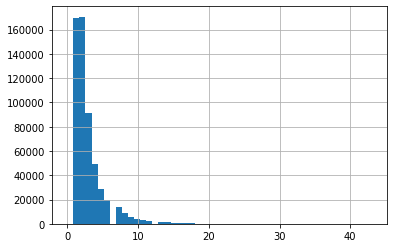

In [20]:
csv['category_length'].hist(bins=50)

In [21]:
csv_cat = pd.DataFrame(csv['category'].explode())
csv_cat['cat_len'] = csv_cat.category.apply(lambda x: len(str(x)))

csv_cat

,category,cat_len
4,2003년 싱글,8
4,제목이 특수 문자인 문서,13
4,하마사키 아유미,8
5,세계수의 미궁 시리즈,11
6,2013년 종영,8
...,...,...
867021,라틴 문자,5
867021,2016년 게임,8
867022,에이지 오브 엠파이어 3,13
867022,에이지 오브 엠파이어 3,14


In [22]:
csv_cat['cat_len'].describe()

count    1.640017e+06
mean     7.037784e+00
std      4.028964e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      9.000000e+00
max      2.240000e+02
Name: cat_len, dtype: float64

In [23]:
csv_cat.sort_values('cat_len', ascending=False).head(10)

,category,cat_len
647781,%ED%95%98%EC%B9%98%EC%8A%A4%EC%B9%B4_%EC%B6%94...,224
647781,||||<bgcolor=#1E90FF><table align=center><:> {...,159
647781,MDAxNTIyMTM5NDg1NDc1.pSDBLb2F4NXZRICmZxnc4UTCO...,123
523092,Heroes of the Storm Global Championship North ...,53
439048,Heroes of the Storm Global Championship North ...,53
449806,Heroes of the Storm Global Championship North ...,53
523085,Heroes of the Storm Global Championship North ...,53
523084,Heroes of the Storm Global Championship North ...,53
449882,Heroes of the Storm Global Championship North ...,53
449888,Heroes of the Storm Global Championship North ...,53


In [4]:
csv['link_length'].describe()

count    867023.000000
mean         24.420514
std          63.475945
min           0.000000
25%           1.000000
50%           9.000000
75%          26.000000
max       11231.000000
Name: link_length, dtype: float64

In [5]:
csv.sort_values('link_length' ,ascending=False).head(10)

C:\Users\KimMinSang\Anaconda3\envs\namu\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  """Entry point for launching an IPython kernel.


ValueError: No axis named link_length for object type Series

In [4]:
cat = csv[['title', 'category']].dropna().explode('category')
cat

,title,category
4,&(싱글),2003년 싱글
4,&(싱글),제목이 특수 문자인 문서
4,&(싱글),하마사키 아유미
5,!!아앗!!,세계수의 미궁 시리즈
6,“……”,2013년 종영/개그콘서트 코너
...,...,...
867021,"Hot Dogs, Horseshoes & Hand Grenades/아이템",2016년 게임/앞서 해보기
867021,"Hot Dogs, Horseshoes & Hand Grenades/아이템",총을 소재로 한 작품
867021,"Hot Dogs, Horseshoes & Hand Grenades/아이템",Windows 게임/라틴 문자
867022,에이지 오브 엠파이어 3/기병,에이지 오브 엠파이어 3


In [25]:
cat_count = cat[['title', 'category']].dropna().groupby('category').count().sort_values('title' ,ascending=False)

cat_count

array([7862, 7154, 6742, ...,    1,    1,    1], dtype=int64)

In [5]:
# possible maximum edges if we construct edges between nodes if they are in catergory
cat_list = cat[['title', 'category']].groupby('category')['title'].apply(list)
cat_list

category
                                   [김인영(각본가), 추신, 코굴, 11시의 음악실, 현대케미칼, 정석동, 오무라이스...
\n[[분류:신데렐라 일레븐/등장인물                                                           [곽신비]
\n기타프릭스1-11th·드럼매니아1-10th 의 수록곡                                               [しりとり]
  CW버스                                                                 [지미 올슨(CW버스)]
  울산광역시의 초등학교                                                           [화진초등학교(울산)]
                                                         ...                        
힙합 음반                              ['Not' Based On True Story, 99(음반), Remapping ...
힙합 크루                              [살롱 01, 오버클래스, 무브먼트(크루), 대남협, Vismajor Company...
힙합|래퍼                                                                          [프란코]
힙합을 소재로 한 작품                       [beatmania(1997), beatmania IIDX(1999), 리플렉 비트...
힙합의 민족 시리즈                                             [힙합의 민족, 힙합의 민족2, 릴보이/힙합의 민족]
Name: title, Length: 65094, dtype: object

In [5]:
G = nx.Graph()

for category, titles  in tqdm(cat_list.iteritems()):
    if category == '' or len(titles) <= 1:
        continue

    G.add_edges_from(list(combinations(titles, 2)))

print(len(G.edges))

26266it [06:32,  2.45it/s]